In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
pumpkins = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv')
pumpkins.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1752,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1753,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/26/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1754,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/27/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.
1755,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/28/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1756,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,9/29/16,275.00,275.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY."


## Data Cleaning

In [3]:
# Check if there is missing data in the current dataframe:
print(pumpkins.shape)
pumpkins.isnull().sum()

(1757, 26)


City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins

,City Name,Package,Variety,Date,Low Price,High Price
0,BALTIMORE,24 inch bins,NaN,4/29/17,270.00,280.00
1,BALTIMORE,24 inch bins,NaN,5/6/17,270.00,280.00
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.00,160.00
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.00,160.00
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11/5/16,90.00,100.00
...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,MINIATURE,9/30/16,14.75,14.75
1753,ST. LOUIS,36 inch bins,MINIATURE,9/26/16,275.00,275.00
1754,ST. LOUIS,36 inch bins,MINIATURE,9/27/16,275.00,275.00
1755,ST. LOUIS,36 inch bins,MINIATURE,9/28/16,275.00,275.00


In [5]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [6]:
month = pd.DatetimeIndex(pumpkins['Date']).month 

In [7]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
price

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64

In [9]:
new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...,...,...
1738,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,15.000
1739,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,14.375
1740,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,12.875
1741,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,12.000


In [10]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [11]:
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...,...,...
1738,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.00
1739,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.75
1740,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.75
1741,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.00


In [12]:
new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.50
71,1,3,1,0,10,7,16.20
72,2,3,1,0,10,7,16.20
73,2,3,1,0,9,6,15.30
74,2,3,1,0,5,3,13.50
...,...,...,...,...,...,...,...
1738,1,1,9,2,5,3,30.00
1739,1,1,9,2,3,3,28.75
1740,1,1,9,2,0,3,25.75
1741,1,1,9,2,1,0,24.00


In [13]:
# Correlation
print(new_pumpkins['Package'].corr(new_pumpkins['Price']))

0.6088482822590124


In [14]:
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int32  
 2   City        415 non-null    int32  
 3   Package     415 non-null    int32  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 21.1 KB


In [15]:
new_columns = ['Package', 'Price']
lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

lin_pumpkins

,Package,Price
70,0,13.50
71,0,16.20
72,0,16.20
73,0,15.30
74,0,13.50
...,...,...
1738,2,30.00
1739,2,28.75
1740,2,25.75
1741,2,24.00


In [16]:
X = lin_pumpkins.values[:, :1]
y = lin_pumpkins.values[:, 1:2]

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

accuracy_score = lin_reg.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)


Model Accuracy:  0.33487841320379996


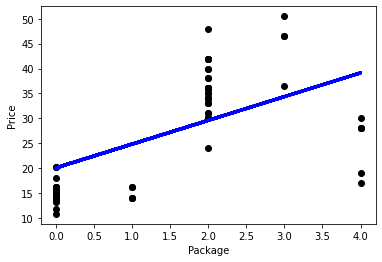

In [18]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()


## Polynomial regression

Another type of linear regression is polynomial regression. While sometimes there's a linear relationship between variables - the bigger the pumpkin in volume, the higher the price - sometimes these relationships can't be plotted as a plane or straight line.

In [19]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis='columns')

poly_pumpkins

,Month,Variety,City,Package,Price
70,1,3,1,0,13.50
71,1,3,1,0,16.20
72,2,3,1,0,16.20
73,2,3,1,0,15.30
74,2,3,1,0,13.50
...,...,...,...,...,...
1738,1,1,9,2,30.00
1739,1,1,9,2,28.75
1740,1,1,9,2,25.75
1741,1,1,9,2,24.00


In [20]:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.149129
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.864428
City,-0.188728,-0.248441,1.000000,0.301604,0.323825
Package,-0.144847,-0.614855,0.301604,1.000000,0.608848
Price,-0.149129,-0.864428,0.323825,0.608848,1.000000


In [25]:
poly_pumpkins.iloc[:,3:4]

,Package
70,0
71,0
72,0
73,0
74,0
...,...
1738,2
1739,2
1740,2
1741,2


In [26]:
poly_pumpkins.iloc[:,4:5]

,Price
70,13.50
71,16.20
72,16.20
73,15.30
74,13.50
...,...
1738,30.00
1739,28.75
1740,25.75
1741,24.00


In [28]:
X=poly_pumpkins.iloc[:,3:4].values
y=poly_pumpkins.iloc[:,4:5].values

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(np.array(X_train), y_train)

y_pred=pipeline.predict(X_test)


In [31]:
accuracy_score = pipeline.score(X_train,y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.8558738910762582


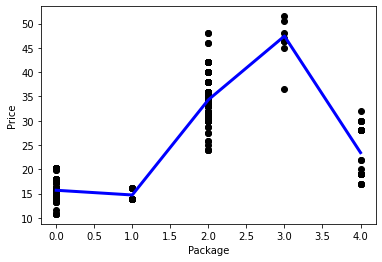

In [30]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_pred[:,0]})
df.sort_values(by='x',inplace = True)
points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1],color="blue", linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X,y, color="black")
plt.show()

## Trials

In [11]:
new = new_pumpkins
new

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


In [12]:
new.iloc[:,0:-1]

,Month,Package,Low Price,High Price
70,9,1 1/9 bushel cartons,15.00,15.0
71,9,1 1/9 bushel cartons,18.00,18.0
72,10,1 1/9 bushel cartons,18.00,18.0
73,10,1 1/9 bushel cartons,17.00,17.0
74,10,1 1/9 bushel cartons,15.00,15.0
...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0
1739,9,1/2 bushel cartons,13.75,15.0
1740,9,1/2 bushel cartons,10.75,15.0
1741,9,1/2 bushel cartons,12.00,12.0


In [13]:
new.iloc[:, 0:-1] = new.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

In [14]:
new

,Month,Package,Low Price,High Price,Price
70,1,0,5,3,13.50
71,1,0,10,7,16.20
72,2,0,10,7,16.20
73,2,0,9,6,15.30
74,2,0,5,3,13.50
...,...,...,...,...,...
1738,1,2,5,3,30.00
1739,1,2,3,3,28.75
1740,1,2,0,3,25.75
1741,1,2,1,0,24.00


In [15]:
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,1,0,5,3,13.50
71,1,0,10,7,16.20
72,2,0,10,7,16.20
73,2,0,9,6,15.30
74,2,0,5,3,13.50
...,...,...,...,...,...
1738,1,2,5,3,30.00
1739,1,2,3,3,28.75
1740,1,2,0,3,25.75
1741,1,2,1,0,24.00


In [16]:
new['Package'] = LabelEncoder().fit_transform(new['Package'])

In [17]:
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,1,0,5,3,13.50
71,1,0,10,7,16.20
72,2,0,10,7,16.20
73,2,0,9,6,15.30
74,2,0,5,3,13.50
...,...,...,...,...,...
1738,1,2,5,3,30.00
1739,1,2,3,3,28.75
1740,1,2,0,3,25.75
1741,1,2,1,0,24.00


In [18]:
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Package     415 non-null    int64  
 2   Low Price   415 non-null    int64  
 3   High Price  415 non-null    int64  
 4   Price       415 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.5 KB
